In [78]:
## Till now : 16 lectures (3 hrs 30 mins)

## In this update : 14 lectures (2 hr 20 mins - 2 hr 40 mins)

    1. Libraries
    
    2. Reading and Exploring the Data
        2.1 An Overview from the Data
        2.2 Initial Prep
        
    3. Graphical Exploration(EDA)
        3.1 Restaurants Overview
        3.2 Restaurants Services
        3.3 Where Are the Good Ones?
        3.4 Zomato Customers Preferences
        3.5 Food Options
        
    4. Predicting the Success of a Restaurant
        4.1 Target Definition
        4.2 Feature Extraction
        4.3 Encoding
        4.4 Training a Model
        4.5 Predictions
        4.6 Accuracy

## 1.. How to read data using sqlite3

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [80]:
import sqlite3

In [81]:
# very first u have to create a SQL connection to our SQLite database
con = sqlite3.connect(r'G:\Data Science projects\EDA_Projects\zomato-bangalore-restaurants\Data_enginnering/zomato_rawdata.sqlite')

In [82]:
#### check online its table name on https://sqliteonline.com/

In [83]:
## takes 40-50 sec

pd.read_sql_query("SELECT * FROM Users", con).head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


#### reading some n number of rows, use LIMIT over there

In [84]:
pd.read_sql_query("SELECT * FROM Users LIMIT 2", con).head(2)

#If we want to load huge amount of data into batches,we can use 
## chunksize parameter,by default it is None

#Syntax is = pd.read_sql_query(query,engine,chunksize=None,parse_dates=None)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [246]:
## takes 40-50 sec

df = pd.read_sql_query("SELECT * FROM Users ", con)

In [86]:
df.shape

(51717, 18)

In [87]:
df.head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari




    url:     contains the url of the restaurant in the zomato website;
    address: contains the address of the restaurant in Bengaluru;
    name:    contains the name of the restaurant;
    online-order: whether online ordering is available in the restaurant or not;
    book-table: table book option available or not;
    rate:     contains the overall rating of the restaurant out of 5;
    votes:    contains total number of rating for the restaurant as of the above mentioned date;
    phone:    contains the phone number of the restaurant;
    location: contains the neighborhood in which the restaurant is located;
    rest-type: restaurant type..

In [88]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

####  An overview from the data

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   index                        51717 non-null  int64 
 1   url                          51717 non-null  object
 2   address                      51717 non-null  object
 3   name                         51717 non-null  object
 4   online_order                 51717 non-null  object
 5   book_table                   51717 non-null  object
 6   rate                         43942 non-null  object
 7   votes                        51717 non-null  int64 
 8   phone                        50509 non-null  object
 9   location                     51696 non-null  object
 10  rest_type                    51490 non-null  object
 11  dish_liked                   23639 non-null  object
 12  cuisines                     51672 non-null  object
 13  approx_cost(for two people)  51

In [90]:
'''

16 features belong to object data-type , ie.. in context to Python , 
they belong to string data-type
Object : dtype NumPy array.
            ie it can hold "string" + any_python_object[integer ,
            float , string ] in a feature 
            pd.Series(["shan", "rahul", 2]) ->> will have dtype as "Object"
 
2 is on int64 nature  , ie 
Variations of int are : ('int64','int32','int16') in numpy library..
 
 

Int16 is a 16 bit signed integer,it means it can store both +ve & -ve values
int16 has has a range of  (2^15 − 1) to -2^15 
int16 has a length of 16 bits (2 bytes).. 
ie Int16 uses 16 bits to store data


Int32 is a 32 bit signed integer,it means it stores both +ve & -ve values
int32 has has a range of (2³¹ − 1) to  -2^31
int32 has a length of 32 bits (4 bytes),, 
ie Int32 uses 32 bits to store data


Int64 is a 64 bit signed integer,it means it can store both +ve & -ve values
int64 has has a range of  (2^63 − 1) to -2^63 
int64 has a length of 64 bits (8 bytes) , 
ie Int64 uses 64 bits to store data


The only difference is that int64 has max range of storing numbers ,
then comes int32 , then 16 , then int8

That means that Int64’s take up twice as much memory-and doing 
operations on them may be a lot slower in some machine architectures.

However, Int64’s can represent numbers much more accurately than 
32 bit floats.They also allow much larger numbers to be stored..





The memory usage of a DataFrame (including the index) is shown 
when calling the info(). A configuration option, display.memory_usage 
(see the list of options), specifies if the DataFrame’s memory usage 
 will be displayed when invoking the df.info() method..
 
 
The + symbol indicates that the true memory usage could be higher, 
because pandas does not count the memory used by values 
in columns with dtype=object


Passing memory_usage='deep' will enable a more accurate 
memory usage report ..

'''

'\n\n16 features belong to object data-type , ie.. in context to Python , they belong to string data-type\nObject : dtype NumPy array.\n            ie it can hold "string" + any_python_object[integer ,float , string ] in a feature \n            pd.Series(["shan", "rahul", 2]) ->> will have dtype as "Object"\n \n2 is on int64 nature  , ie \nVariations of int are : (\'int64\',\'int32\',\'int16\') in numpy library..\n \n \n\nInt16 is a 16 bit signed integer , it means it can store both positive & negative values\nint16 has has a range of  (2^15 − 1) to -2^15 \nint16 has a length of 16 bits (2 bytes).. ie Int16 uses 16 bits to store data\n\n\nInt32 is a 32 bit signed integer , it means it storesboth positive & negative values\nint32 has has a range of (2³¹ − 1) to  -2^31\nint32 has a length of 32 bits (4 bytes),, ie Int32 uses 32 bits to store data\n\n\nInt64 is a 64 bit signed integer , it means it can store both positive & negative values\nint64 has has a range of  (2^63 − 1) to -2^63 \n

In [91]:
df.info(memory_usage='deep')

#### ie , memory usage: 572.3 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   index                        51717 non-null  int64 
 1   url                          51717 non-null  object
 2   address                      51717 non-null  object
 3   name                         51717 non-null  object
 4   online_order                 51717 non-null  object
 5   book_table                   51717 non-null  object
 6   rate                         43942 non-null  object
 7   votes                        51717 non-null  int64 
 8   phone                        50509 non-null  object
 9   location                     51696 non-null  object
 10  rest_type                    51490 non-null  object
 11  dish_liked                   23639 non-null  object
 12  cuisines                     51672 non-null  object
 13  approx_cost(for two people)  51

## 2.. data cleaning/Data preparation !

In [92]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

#### getting all NAN features

In [93]:
feature_na = [feature for feature in df.columns if df[feature].\
                                              isnull().sum()>0]
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [94]:
#% of missing values
import numpy as np
for feature in feature_na:
    print('{} has {} % missing values'.format(feature , \
                  np.round(df[feature].isnull().sum()/len(df)*100,4)))

rate has 15.0337 % missing values
phone has 2.3358 % missing values
location has 0.0406 % missing values
rest_type has 0.4389 % missing values
dish_liked has 54.2916 % missing values
cuisines has 0.087 % missing values
approx_cost(for two people) has 0.669 % missing values


### Preparing Approx_cost column

In [95]:
df['approx_cost(for two people)'].dtype
'''

O is a type character code for Object dtype

'''

'\n\nO is a type character code for Object dtype\n\n'

In [96]:
df[df['approx_cost(for two people)'].isnull()]

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
1662,1662,https://www.zomato.com/bangalore/papa-khan-ras...,"6, Abbiah Layout KC Halli Main Road, Bommanaha...",Papa Khan Rasoi,No,No,None,0,None,None,None,None,None,None,[],[],Delivery,Bannerghatta Road
1768,1768,https://www.zomato.com/bangalore/innate-jp-nag...,"45, 14th Main, 7th phase, Puttehahalli Palya, ...",Innate,No,No,None,0,None,JP Nagar,Delivery,None,Beverages,None,[],[],Delivery,Bannerghatta Road
1795,1795,https://www.zomato.com/bangalore/super-chefs-b...,"8/3, Opposite Suryadhoya Convention hall, Bann...",Super Chef's (New Royal treat),No,No,None,0,None,Bannerghatta Road,Quick Bites,None,"North Indian, Chinese, South Indian",None,"[('Rated 1.0', 'RATED\n Many items were missi...",[],Delivery,Bannerghatta Road
3069,3069,https://www.zomato.com/bangalore/super-chefs-b...,"8/3, Opposite Suryadhoya Convention hall, Bann...",Super Chef's (New Royal treat),No,No,-,0,None,Bannerghatta Road,Quick Bites,None,"North Indian, Chinese, South Indian",None,"[('Rated 1.0', 'RATED\n Many items were missi...",[],Delivery,Basavanagudi
3774,3774,https://www.zomato.com/bangalore/the-hub-ibis-...,"Ibis Bengaluru, Opposite RMZ Ecospace Business...",The Hub - Ibis Bengaluru,No,No,3.9/5,237,None,Marathahalli,Bar,"Dal Makhani, Cocktails, Lunch Buffet, Breakfas...",Finger Food,None,"[('Rated 4.0', 'RATED\n The Hub is a small ba...",[],Buffet,Bellandur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50940,50940,https://www.zomato.com/bangalore/cinnabon-whit...,"Ground Floor, The Forum Neighborhood Mall, Pre...",Cinnabon,No,No,4.0 /5,80,None,Whitefield,Quick Bites,"Rolls, Cinnamon Roll, Cinnamon Bun","Beverages, American, Bakery",None,"[('Rated 4.0', ""RATED\n Who else is a Cinnabo...",[],Desserts,Whitefield
51233,51233,https://www.zomato.com/bangalore/mayas-kitchen...,"43/9, Borewell Rd, Palm Meadows, Nallurhalli, ...",Mayas kitchen,No,No,None,0,None,Whitefield,Casual Dining,None,"South Indian, Chinese, Chettinad",None,"[('Rated 4.0', ""RATED\n Food was pretty good,...",[],Dine-out,Whitefield
51247,51247,https://www.zomato.com/bangalore/mast-kalandar...,"D64, 33, 1st Floor, Sundari Armadale, Next To ...",Mast Kalandar,No,No,2.6 /5,76,None,Whitefield,Casual Dining,"Gulab Jamun, Lassi, Dal Makhani, Buttermilk, T...",North Indian,None,"[('Rated 1.0', 'RATED\n Terrible food in this...",[],Dine-out,Whitefield
51271,51271,https://www.zomato.com/bangalore/karavalli-foo...,"N254-107, 1st Main Road, Near ITPL Gate 3, KIA...",Karavalli Food Court,No,No,3.2 /5,4,None,Whitefield,Casual Dining,None,South Indian,None,"[('Rated 1.0', 'RATED\n i was a regular custo...",[],Dine-out,Whitefield


In [97]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', None, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [247]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].\
                                    astype(str).str.replace(',', '')

In [248]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].\
                                    astype(float)

In [249]:
df['approx_cost(for two people)'].dtype

dtype('float64')

In [101]:
'''

### right now it has some NAN Values so it will be of float data-type,
### dats why very first I have to convert it into string then
### I have to remove this comma

df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).apply(lambda x: x.replace(',', ''))
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)


'''


"\n\n### right now it has some NAN Values so it will be of float data-type,dats why very first I have to convert it into string then\n### I have to remove this comma\ndf['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).apply(lambda x: x.replace(',', ''))\ndf['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)\n\n\n"

### preparing rate col

In [102]:
df['rate']

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51712    3.6 /5
51713      None
51714      None
51715    4.3 /5
51716    3.4 /5
Name: rate, Length: 51717, dtype: object

In [103]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [250]:
df['rate'] = df['rate'].str.replace('/5', '')

In [251]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       None, '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4',
       '2.2', '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ',
       '4.1 ', '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ',
       '2.5 ', '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1',
       '2.0', '1.8', '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ',
       '2.4 ', '2.1 ', '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [106]:
### None is not enclosed in string , so lets convert each of the sub-category into string using astype(str)
## so that later-on , we can do some manipulations ..

In [252]:
df['rate'] = df['rate'].astype(str)

In [253]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       'None', '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4',
       '2.2', '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ',
       '4.1 ', '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ',
       '2.5 ', '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1',
       '2.0', '1.8', '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ',
       '2.4 ', '2.1 ', '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [254]:
df['rate'].str.contains('NEW').sum()

2208

In [255]:
df['rate'].str.contains('-').sum()

69

In [256]:
df['rate'].str.contains('None').sum()

7775

In [257]:
df['rate'].isnull().sum()

0

In [259]:
df['rate'].replace('NEW', np.nan, inplace=True)
df['rate'].replace('-', np.nan, inplace=True)
df['rate'].replace('None', np.nan, inplace=True)

In [260]:
df['rate'].isnull().sum()

10052

In [115]:
'''
NaN is short for Not a number. It is used to represent entries 
that are undefined. 
It is also used for representing missing values in a dataset.

'''

'\nNaN is short for Not a number. It is used to represent entries that are undefined. \nIt is also used for representing missing values in a dataset.\n\n'

In [116]:
df['rate']

0         4.1
1         4.1
2         3.8
3         3.7
4         3.8
         ... 
51712    3.6 
51713     NaN
51714     NaN
51715    4.3 
51716    3.4 
Name: rate, Length: 51717, dtype: object

In [117]:
df['rate'][51713]

nan

In [261]:
df['rate'] = df['rate'].astype(float)

In [262]:
df['rate'].dtype

dtype('float64')

## 3.. Analysing most famous dishes of some most famous rest ..

In [121]:
'''

3.. To find most common words or trending words in any feature 
    use str.cat() on Series & it gives all data in string 
                OR
        convert series into list 
    optimal one : do cleaning using re.sub() or str.replace() before str.cat
    

4.. Ways to viz. most common words or trending words in any feature  : 2 ways 
    ie , If we have text data , there are 2 ways : 
    ( wordcloud , plots(line,pie etc..) to show Top 25 words )
    or u can use unigram , bigram , trigram as well !
    Follow : DA_Airnb_NYC.ipynb

    For wordcloud , cleaning of data : 2 ways
    using re.sub() , df[col].str.replace()

    Do follow : 4.. Zomato_( 3 ).ipynb


'''

'\n\n3.. To find most common words or trending words in any feature \n    use str.cat() on Series & it gives all data in string \n                OR\n        convert series into list \n    optimal one : do cleaning using re.sub() or str.replace() before str.cat\n    \n\n4.. Ways to viz. most common words or trending words in any feature  : 2 ways \n    ie , If we have text data , there are 2 ways : ( wordcloud , plots(line,pie etc..) to show Top 25 words )\n    or u can use unigram , bigram , trigram as well !\n    Follow : DA_Airnb_NYC.ipynb\n\n    For wordcloud , cleaning of data : 2 ways\n    using re.sub() , df[col].str.replace()\n\n    Do follow : 4.. Zomato_( 3 ).ipynb\n\n\n'

In [122]:
'''

We will consider those rest as most famous rest which have 
delivered max number of Orders

'''

'\n\nWe will consider those rest as most famous rest which have delivered max number of Orders\n\n'

In [123]:
df['rest_type'].value_counts()[0:4]

Quick Bites      19132
Casual Dining    10330
Cafe              3732
Delivery          2604
Name: rest_type, dtype: int64

In [124]:
### Lets analyse most famous dishes of 'Quick bites first'

In [125]:
df['rest_type'].isna().sum()

227

In [126]:
data = df.dropna(subset=['rest_type'])

In [127]:
data['rest_type']

0              Casual Dining
1              Casual Dining
2        Cafe, Casual Dining
3                Quick Bites
4              Casual Dining
                ...         
51712                    Bar
51713                    Bar
51714                    Bar
51715                    Bar
51716     Bar, Casual Dining
Name: rest_type, Length: 51490, dtype: object

In [128]:
data_qb = data[data['rest_type'].str.contains('Quick Bites')]

In [129]:
data_qb.shape

(20639, 18)

In [130]:
data_qb['dish_liked']

3                                              Masala Dosa
23                                         Pasta, Iced Tea
26                                                    None
31       Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...
34       Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...
                               ...                        
51641                                                 None
51642                                                 None
51643                                                 None
51644                                                 None
51645                                              Burgers
Name: dish_liked, Length: 20639, dtype: object

In [131]:
data_qb['dish_liked'].str.lower().str.cat()

## Storing all dishes in a string so that later-on , 
## we can plot it using wordcloud or Plots/charts ..

'masala dosapasta, iced teaburgers, lassi, chicken grill, naan, momos, chicken burger, biryanirolls, veggie wrap, chocolate fantasy, rice bowls, chicken rice, paneer makhanwala, chicken tikka wrapdabeli, faluda, masala poori, sandwiches, tokri chaat, pav bhaji, dahipuriburgers, fries, hot chocolatepane pizza, lava cake, pasta, stuffed garlic bread, chocolava cake, tacosbiryaniparatha, pastapasta, momos, rolls, chicken roll, chilli chicken, paneer roll, spaghettigrape juice, chicken grill, chicken tikka roll, shawarma roll, chicken shawarama, biryani combo, rollsvegetable biryani, ginger chicken, chicken biryani, donne biryani, chicken kebab, egg bhurji, dum biryanirolls, momos, fries, veggie roll, chicken kebab roll, paneer roll, cheese rollbenne dosa, mirchi bajji, filter coffee, poha, tea, butter dosa, crispy dosamasala dosapanipuri, chaat, noodles, dahi bhallerooftop ambiencecoffee, tea, kesari bath, open dosa, vada, idli, bread dosamasala dosa, tirupathi pongal, filter coffee, vada

In [132]:
from wordcloud import WordCloud ,STOPWORDS

In [133]:
stopwords = set(STOPWORDS)

(-0.5, 1499.5, 1499.5, -0.5)

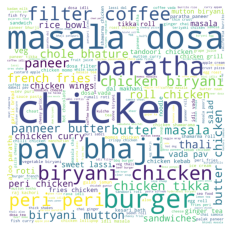

In [134]:
wordcloud = WordCloud(max_font_size=None, background_color='white',\
                      stopwords = stopwords,width=1500, height=1500).\
                    generate(data_qb['dish_liked'].str.lower().str.cat())

plt.imshow(wordcloud)
plt.axis("off")

In [135]:
from collections import Counter
Counter(data_qb['dish_liked'].str.lower().str.cat().split(',')).most_common(5)

## but this is not making more insights : 

[(' paratha', 409),
 (' tea', 249),
 (' thali', 245),
 (' sandwiches', 239),
 (' fries', 236)]

#### Similarly Lets analyse most famous dishes of some Most rest ['Quick Bites', 'Casual Dining', 'Cafe', 'Delivery']

In [136]:
def produce_wordcloud(list_rest_type):
    
    plt.figure(figsize=(20,30))
    
    for index,restaurant_type in enumerate(list_rest_type):
        plt.subplot(3,2,index+1)
        current_rest_df = data[data['rest_type'].str.contains(restaurant_type)]
        entire_dishes = current_rest_df['dish_liked'].str.lower().str.cat()
        
        
        wordcloud = WordCloud(max_font_size=None, background_color='white',stopwords = stopwords,width=1500, height=1500).generate(entire_dishes)
        plt.imshow(wordcloud)
        plt.title(restaurant_type ,fontsize=40 )
        plt.axis("off")
        

In [137]:
df['rest_type'].value_counts()[0:4].index

Index(['Quick Bites', 'Casual Dining', 'Cafe', 'Delivery'], dtype='object')

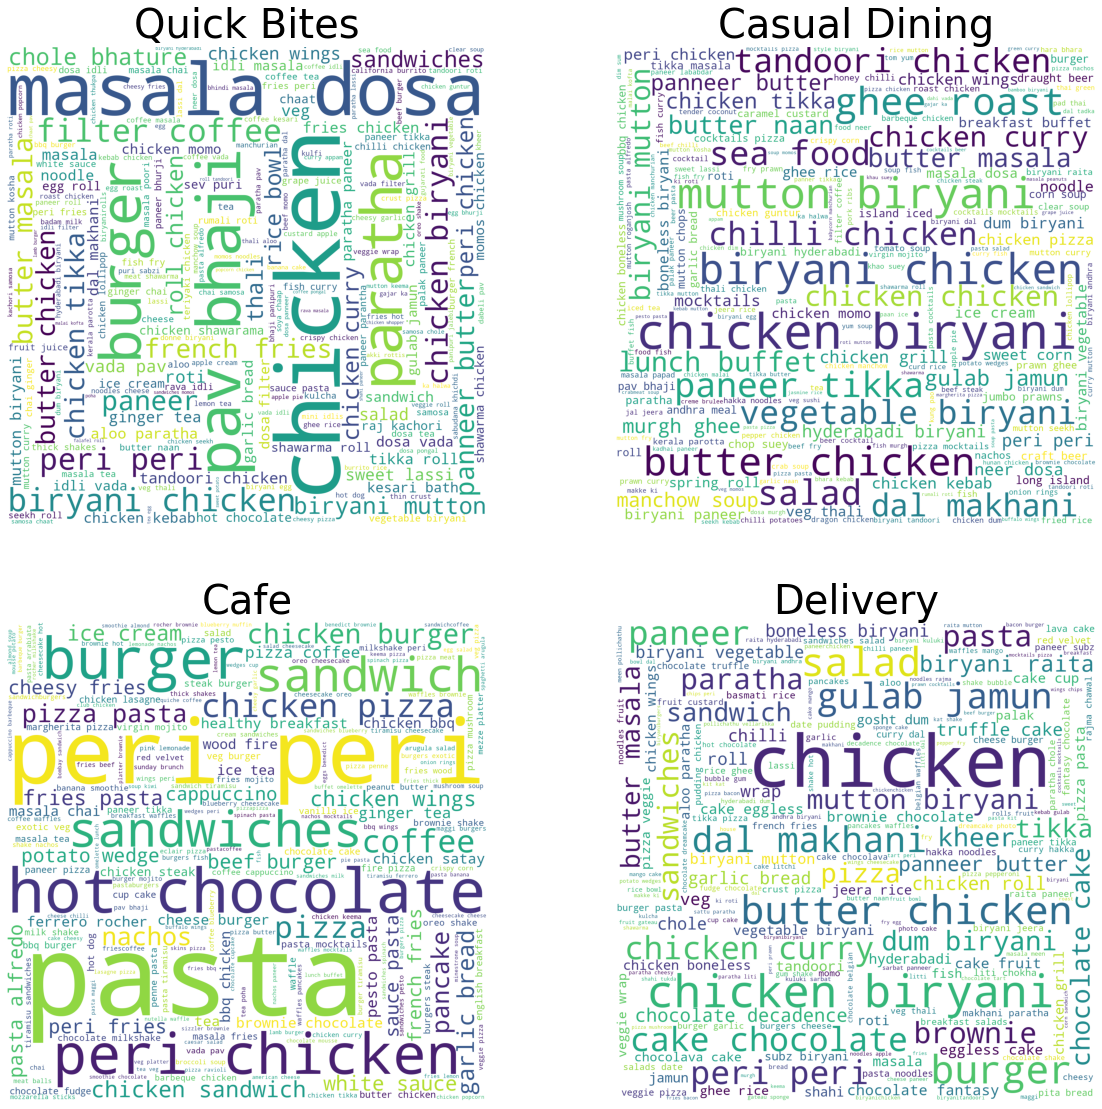

In [138]:
produce_wordcloud(['Quick Bites', 'Casual Dining', 'Cafe', 'Delivery']) ## takes 1 min 

In [139]:
'''
From this WordCloud , it seems that Bengalore is Chicken-lover ..

'''

'\nFrom this WordCloud , it seems that Bengalore is Chicken-lover ..\n\n'

## 4.. Handling Missing Values : 

In [217]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                           10052
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

###### how to deal with these missing values ,, 
    -->> if its a ML/NLP/DL project , then filling missing values makes alot of sense..

    -->> but as its is data analysis project & Imagine we do not have domain knowledge , 
        then its good to continue with existing Genuine data rather than 
        filling missing values or deleting it..
    
        -->>> Bcz if we fill missing values then it can affect our real analysis  ,
        -->>  & if we delete our missing values,then we will lose our data 
              & hence we will end up having incomplete analysis

    Before deleting or Skipping Null values

    -->> We are intersted in this analysis for the rate feature , 
         so dropping missing values of rate might affect 
         other features for analyis..

    -->> So Lets try to save as much of our data

    -->> So let's have a look on the review list column

In [263]:
df[df['rate'].isnull()] ## rows in which 'rate' have missing value ..

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
72,72,https://www.zomato.com/bangalore/spicy-tandoor...,"Opposite ICICi Bank, Hanuman Nagar, Banashanka...",Spicy Tandoor,No,No,NaN,0,+91 8050884222,Banashankari,Quick Bites,None,North Indian,150.0,"[('Rated 4.0', 'RATED\n cost for chicken roll...",[],Delivery,Banashankari
75,75,https://www.zomato.com/bangalore/om-sri-vinaya...,"39, S B M Colony, Near-Sita Circle, 1st Stage,...",Om Sri Vinayaka Chats,No,No,NaN,0,+91 8553206035,Banashankari,"Takeaway, Delivery",None,"Street Food, Fast Food",500.0,[],[],Delivery,Banashankari
84,84,https://www.zomato.com/bangalore/chill-out-ban...,"161/C, 6th Main, 80 Feet Road, Bhuvaneshwari N...",Chill Out,No,No,NaN,0,+91 9341215167,Banashankari,Quick Bites,None,"South Indian, Chinese",100.0,"[('Rated 4.0', 'RATED\n Good Location. Small ...",[],Delivery,Banashankari
90,90,https://www.zomato.com/bangalore/me-and-my-cak...,"BDA Shopping Complex, 24th Cross Road, Siddann...",Me And My Cake,No,No,NaN,0,+91 9036070410,Banashankari,Delivery,None,"Bakery, Desserts",500.0,"[('Rated 1.0', 'RATED\n Do not order anything...",[],Delivery,Banashankari
91,91,https://www.zomato.com/bangalore/sunsadm-banas...,"Shop 18 , 3rd cross road,Markandeya Layout, Ba...",Sunsadm,No,No,NaN,0,+91 7829290358,Banashankari,"Takeaway, Delivery",None,South Indian,400.0,[],[],Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51644,51644,https://www.zomato.com/bangalore/punjabi-thadk...,"7/3, ASK Tower, Kundanahalli Gate, Next to Bat...",Punjabi Thadka,No,No,NaN,0,+91 7338330336\n+91 9591568221,Brookefield,Quick Bites,None,North Indian,400.0,[],[],Dine-out,Whitefield
51675,51675,https://www.zomato.com/bangalore/topsy-turvey-...,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,No,No,NaN,0,+91 9148155994,Whitefield,Bar,None,Finger Food,900.0,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Drinks & nightlife,Whitefield
51710,51710,https://www.zomato.com/bangalore/topsy-turvey-...,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,No,No,NaN,0,+91 9148155994,Whitefield,Bar,None,Finger Food,900.0,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Pubs and bars,Whitefield
51713,51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,None,Finger Food,600.0,[],[],Pubs and bars,Whitefield


In [264]:
df['reviews_list'][74] ## as at 74 index we have Nan in 'rate'

### if we will observe  , we have rating in reviews_list in each of the row...
### so lets try to fill missing values of rate feature using this reviews_list feature..

'[(\'Rated 3.0\', "RATED\\n  Had the urge to have rolls and upon googling found this place near to where I stay! Tried it out and I will go again!! I had tava panneer roll.. The best one that I\'ve had till date. The best one!! The taste is divine and is superb!! It\'s an open kitchen and one can pretty much c what\'s happening in there. Hygenic for sure! Very nice. The service wasn\'t slow as such. I got it in less than 5-10 mins of ordering it. Lot of delivery guys were there. Online delivery is a big hit I guess.. Had Veg momos too.. Not the best one. Hence the rating 3.. Was surprised to see momos being heated up in an oven. Didn\'t taste like momos.. Was not great.. Can easily avoid!! Nevertheless my next visit will for sure be only for rolls!! Super ones!!"), (\'Rated 3.0\', "RATED\\n  Good place, nice food and snacks. Friendly people and good tasting food. The prices have increased so it\'s not quite worth the item anymore, but once to try it out, it\'s not bad.\\nThe momos and 

    -->> Using ast library , we will convert this string into list 
         having separator as comma(,)
         
    -->> Then from this list , we can easily find our rating..

In [265]:
# if we check for each value type
type(df['reviews_list'][74])

str

In [224]:
import ast ## inbuilt module ast (abstract syntax trees)

In [266]:
# return to a list of tuples

## ast.literal_eval(node_or_string)
ast.literal_eval((df['reviews_list'][74]))


## (dataframe['reviews_list'][74].split(',') -> 
## doesnt give expected results !

[('Rated 3.0',
  "RATED\n  Had the urge to have rolls and upon googling found this place near to where I stay! Tried it out and I will go again!! I had tava panneer roll.. The best one that I've had till date. The best one!! The taste is divine and is superb!! It's an open kitchen and one can pretty much c what's happening in there. Hygenic for sure! Very nice. The service wasn't slow as such. I got it in less than 5-10 mins of ordering it. Lot of delivery guys were there. Online delivery is a big hit I guess.. Had Veg momos too.. Not the best one. Hence the rating 3.. Was surprised to see momos being heated up in an oven. Didn't taste like momos.. Was not great.. Can easily avoid!! Nevertheless my next visit will for sure be only for rolls!! Super ones!!"),
 ('Rated 3.0',
  "RATED\n  Good place, nice food and snacks. Friendly people and good tasting food. The prices have increased so it's not quite worth the item anymore, but once to try it out, it's not bad.\nThe momos and rolls here

In [267]:
type((df['reviews_list'][74]))

str

In [268]:
# check for the first input
first_input = ast.literal_eval(df['reviews_list'][74])[0]
first_input

('Rated 3.0',
 "RATED\n  Had the urge to have rolls and upon googling found this place near to where I stay! Tried it out and I will go again!! I had tava panneer roll.. The best one that I've had till date. The best one!! The taste is divine and is superb!! It's an open kitchen and one can pretty much c what's happening in there. Hygenic for sure! Very nice. The service wasn't slow as such. I got it in less than 5-10 mins of ordering it. Lot of delivery guys were there. Online delivery is a big hit I guess.. Had Veg momos too.. Not the best one. Hence the rating 3.. Was surprised to see momos being heated up in an oven. Didn't taste like momos.. Was not great.. Can easily avoid!! Nevertheless my next visit will for sure be only for rolls!! Super ones!!")

In [229]:
for i in first_input:
    print(i)

Rated 3.0
RATED
  Had the urge to have rolls and upon googling found this place near to where I stay! Tried it out and I will go again!! I had tava panneer roll.. The best one that I've had till date. The best one!! The taste is divine and is superb!! It's an open kitchen and one can pretty much c what's happening in there. Hygenic for sure! Very nice. The service wasn't slow as such. I got it in less than 5-10 mins of ordering it. Lot of delivery guys were there. Online delivery is a big hit I guess.. Had Veg momos too.. Not the best one. Hence the rating 3.. Was surprised to see momos being heated up in an oven. Didn't taste like momos.. Was not great.. Can easily avoid!! Nevertheless my next visit will for sure be only for rolls!! Super ones!!


In [230]:
[i.replace('Rated','').strip() for i in first_input]

['3.0',
 "RATED\n  Had the urge to have rolls and upon googling found this place near to where I stay! Tried it out and I will go again!! I had tava panneer roll.. The best one that I've had till date. The best one!! The taste is divine and is superb!! It's an open kitchen and one can pretty much c what's happening in there. Hygenic for sure! Very nice. The service wasn't slow as such. I got it in less than 5-10 mins of ordering it. Lot of delivery guys were there. Online delivery is a big hit I guess.. Had Veg momos too.. Not the best one. Hence the rating 3.. Was surprised to see momos being heated up in an oven. Didn't taste like momos.. Was not great.. Can easily avoid!! Nevertheless my next visit will for sure be only for rolls!! Super ones!!"]

In [231]:
float([i.replace('Rated','').strip() for i in first_input][0])

3.0

In [ ]:
### let's make our function

In [232]:
### now We are going to extract the rate for the first input restaurant in our data from the reviews column

def get_rate(x):
    '''
    extract the rating from every row
    '''
    list_of_reviews = ast.literal_eval(x)
    # ensure that x is not Null and there is more than one rate
    
    if list_of_reviews is None or len(list_of_reviews) <= 1:
        return None
    else:
        rate = float([i.replace('Rated','').strip() for i in list_of_reviews[0]][0])
        return rate


In [269]:
df['reviews_list'].apply(get_rate) ## takes 1-2 mins

In [237]:
get_rate(df['reviews_list'][74])

3.0

## 5.. Imputing Missing values :

In [ ]:
df['rate_from_reviews_list'] = df['reviews_list'].apply(get_rate) ## takes 1-2 mins

In [270]:
nan_index = df[df['rate'].isnull()].index ## getting all the Nan's indexes

In [271]:
nan_index

Int64Index([   72,    75,    84,    90,    91,    92,   107,   110,   113,
              114,
            ...
            51636, 51638, 51639, 51642, 51643, 51644, 51675, 51710, 51713,
            51714],
           dtype='int64', length=10052)

In [272]:
###  filling the missing values of rate feature..

for index in nan_index:
    df.loc[index,'rate'] = df.loc[index,'rate_from_reviews_list'] 

In [273]:
df['rate'].isna().sum() 
### ie we are able to fill approx 1500 missing values of 'rate'..

8542

In [ ]:
df.isnull().sum()

In [ ]:
### Since more than 50% data in dish_liked feature is vacant , 
## lets drop this feature ..

In [334]:
dataframe = df.drop(['dish_liked','rate_from_reviews_list'] , axis=1)

In [335]:
dataframe.shape

(51717, 17)

In [336]:
dataframe = dataframe.dropna()

In [337]:
dataframe.shape

(42144, 17)

## 6.. Doing Feature extraction : 

In [281]:
dataframe['cuisines']

0                     North Indian, Mughlai, Chinese
1                        Chinese, North Indian, Thai
2                             Cafe, Mexican, Italian
3                         South Indian, North Indian
4                           North Indian, Rajasthani
                            ...                     
51709                      North Indian, Continental
51711    Andhra, South Indian, Chinese, North Indian
51712                                    Continental
51715                                    Finger Food
51716         Finger Food, North Indian, Continental
Name: cuisines, Length: 42144, dtype: object

In [282]:
len(dataframe['cuisines'][0].split(','))

3

In [283]:
def count(row):
    return len(row.split(','))

In [338]:
dataframe['total_cuisines'] = dataframe['cuisines'].astype(str).\
                                                    apply(count)

dataframe['multiple_types'] = dataframe['rest_type'].astype(str).\
                                                    apply(count)

### dataframe['cuisines'].str.split(',').str.len()

In [150]:
dataframe.head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),total_cuisines,multiple_types
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,3,1
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,3,1


In [339]:
# Defining a custom threshold for splitting restaurants into good and bad
threshold = 3.80
dataframe['target'] = dataframe['rate'].apply(lambda x: 1 \
                                  if x >= threshold else 0)


In [286]:
dataframe.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'total_cuisines',
       'multiple_types', 'target'],
      dtype='object')

## 7... Feature importance !

In [287]:
dataframe.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'total_cuisines',
       'multiple_types', 'target'],
      dtype='object')

In [341]:
dataframe['target'].dtype

dtype('int64')

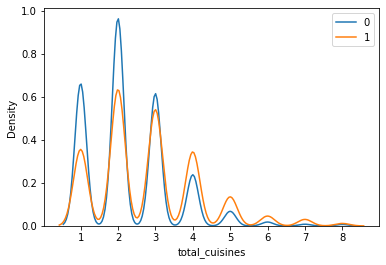

In [288]:
sns.distplot(dataframe[dataframe['target']==0]['total_cuisines'] ,\
                                             hist=False , label='0')

sns.distplot(dataframe[dataframe['target']==1]['total_cuisines'] ,\
                                             hist=False , label='1')

plt.legend()

In [155]:
### As we have complete overlappping region in distribution plot 
### when class is 0 , we have higher count of 'total_cuisines' than class 1 

## it means 'total_cuisines' is not an interesting feature in predicting 
## whether rest will be success or not as we have very high overlapping region

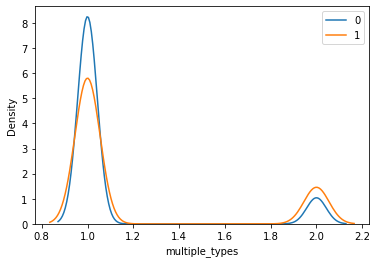

In [289]:
sns.distplot(dataframe[dataframe['target']==0]['multiple_types'] , \
                                             hist=False , label='0')

sns.distplot(dataframe[dataframe['target']==1]['multiple_types'] , \
                                             hist=False , label='1')
plt.legend()

### sns.FacetGrid(data , hue='target' ).map(sns.kdeplot , 'multiple_types')

In [157]:
### As we have complete overlappping region in distribution plot 
### when class is 0 , we have higher count of 'multiple_types' 
## than class 1 

## it means 'multiple_types' is not an interesting feature in 
## predicting whether rest will be success or not 
## as we have very high overlapping region


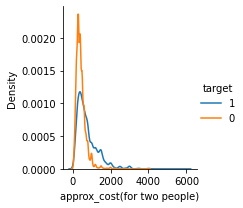

In [301]:
sns.FacetGrid(dataframe , hue='target' ).map(sns.kdeplot , \
                     'approx_cost(for two people)').add_legend()

<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='Density'>

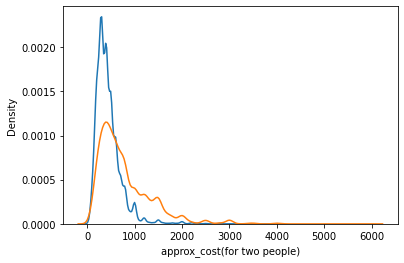

In [159]:
sns.distplot(dataframe[dataframe['target']==0]\
             ['approx_cost(for two people)'] , hist=False )

sns.distplot(dataframe[dataframe['target']==1]\
             ['approx_cost(for two people)']  , hist=False)

### sns.FacetGrid(data , hue='target' ).map(sns.kdeplot , 'approx_cost(for two people)')

<AxesSubplot:xlabel='votes', ylabel='Density'>

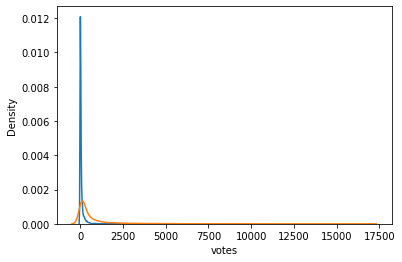

In [343]:
sns.distplot(dataframe[dataframe['target']==0]['votes'] ,\
                                         hist=False )

sns.distplot(dataframe[dataframe['target']==1]['votes'] ,\
                                             hist=False)

<AxesSubplot:xlabel='target', ylabel='votes'>

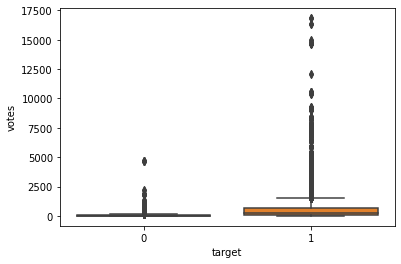

In [342]:
sns.boxplot(y='votes' , data=dataframe , x='target')

### for a rest to be success , it must have high number of 'votes'

In [ ]:
### ie upto some extent , 'votes' feature is useful ..

In [160]:
### Scatterplot or even pairplot doesn't make sense for 
## 'total_cuisine' & 'multiple_types' .. bcz in both the featues ,
## there are few unique values & values are int in nature

## 8.. How to select best Feature Encoding Technique !

In [ ]:
dataframe = dataframe.dropna() 

## very first lets drop rest of the missing values we have 
## as we have already impute it ..

In [340]:
dataframe.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'total_cuisines',
       'multiple_types', 'target'],
      dtype='object')

In [344]:
imp_features = ['online_order','book_table','votes' ,'location', \
                'rest_type','approx_cost(for two people)' ,\
                'listed_in(type)', 'listed_in(city)','target']

In [345]:
dataframe[imp_features].isnull().sum()

online_order                   0
book_table                     0
votes                          0
location                       0
rest_type                      0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
target                         0
dtype: int64

In [347]:
data = dataframe[imp_features]

In [348]:
data.dtypes

online_order                    object
book_table                      object
votes                            int64
location                        object
rest_type                       object
approx_cost(for two people)    float64
listed_in(type)                 object
listed_in(city)                 object
target                           int64
dtype: object

In [328]:
# Splitting features by data type
cat_features= [col for col in data.columns if data[col].\
               dtype == 'O']

num_features= [col for col in data.columns if data[col].\
               dtype != 'O']

In [329]:
for feature in cat_features:
    print('{} has total {} unique features'.format(feature, \
                                   data[feature].nunique()))

online_order has total 2 unique features
book_table has total 2 unique features
location has total 92 unique features
rest_type has total 87 unique features
listed_in(type) has total 7 unique features
listed_in(city) has total 30 unique features
target has total 2 unique features


In [168]:
## on online_order,book_table & listed_in(type) we can apply Label Encoding !

In [169]:
'''

Regarding One-hot encoding which is the most used & basic one as well , 
So if we will observe over here,we have many categories in 
'rest_type' ,'location' , 'listed_in(city)' , 
thus if we encode it using onne-hot encoding, it will consume more memory
in our system & will create un-necessarily 205
more features as (92-1) + (87-1) + (30-1) = 206 features

'''

"\n\nRegarding One-hot encoding which is the most used & basic one as well , \nSo if we will observe over here,we have many categories in 'rest_type' ,'location' , 'listed_in(city)' , \nthus if we encode it using onne-hot encoding, it will consume more memory in our system & will create un-necessarily 205\nmore features as (92-1) + (86-1) + (30-1) = 205 features\n\n"

In [330]:
cols=['location','rest_type','listed_in(city)']

for col in cols:
    print('Total feature in {} are {}'.format(col,data[col].nunique()))
    print(data[col].value_counts()/(len(data))*100)
    print('\n')

Total feature in location are 92
BTM                      9.586181
Koramangala 5th Block    5.457479
HSR                      4.857156
Indiranagar              4.325645
JP Nagar                 4.235478
                           ...   
West Bangalore           0.009491
Yelahanka                0.009491
Rajarajeshwari Nagar     0.004746
Nagarbhavi               0.002373
Peenya                   0.002373
Name: location, Length: 92, dtype: float64


Total feature in rest_type are 87
Quick Bites                  33.857726
Casual Dining                23.156321
Cafe                          7.984529
Dessert Parlor                4.477506
Delivery                      4.057517
                               ...    
Dessert Parlor, Kiosk         0.004746
Food Court, Beverage Shop     0.004746
Bakery, Beverage Shop         0.002373
Quick Bites, Kiosk            0.002373
Bakery, Food Court            0.002373
Name: rest_type, Length: 87, dtype: float64


Total feature in listed_in(city) are 30

In [171]:
'''
For "listed_in(city)" , since each of the sub-category is 
contributing approx equally , hence reducing number of sub-categories
doesnt make sense , so lets use Mean Encoding technique 

Similarly for "location" , since each of the sub-category 
is contributing approx equally , hence reducing number of 
sub-categories doesnt make sense , so lets use Mean Encoding technique 

But in "rest_type" ,Quick Bites & Casual Dining are dominating , 
hence here u can use One-hot with slight modifications 
which we will discuss later ..

'''

'\nFor "listed_in(city)" , since each of the sub-category is contributing approx equally , hence reducing number of sub-categories\ndoesnt make sense , so lets use Mean Encoding technique \n\nSimilarly for "location" , since each of the sub-category is contributing approx equally , hence reducing number of \nsub-categories doesnt make sense , so lets use Mean Encoding technique \n\nBut in "rest_type" ,Quick Bites & Casual Dining are dominating , hence here u can use One-hot with slight modifications \nwhich we will discuss later ..\n\n'

## 9.. Performing Mean Encoding on data !

In [349]:
dict_mean_city = data.groupby(['listed_in(city)'])['target'].\
                                mean().to_dict()

dict_mean_city



### ie at BTM , 49.04 % restaurants are successful !
## ie at Banashankari , 48 percent rest. are successful !

{'BTM': 0.4904027098231088,
 'Banashankari': 0.48299319727891155,
 'Bannerghatta Road': 0.35901509134233517,
 'Basavanagudi': 0.517113783533765,
 'Bellandur': 0.4050761421319797,
 'Brigade Road': 0.5953488372093023,
 'Brookefield': 0.3589087809036658,
 'Church Street': 0.5930232558139535,
 'Electronic City': 0.2645381984036488,
 'Frazer Town': 0.518935516888434,
 'HSR': 0.4685672514619883,
 'Indiranagar': 0.5648030495552732,
 'JP Nagar': 0.42916419679905154,
 'Jayanagar': 0.49442755825734547,
 'Kalyan Nagar': 0.4370731707317073,
 'Kammanahalli': 0.44317096466093603,
 'Koramangala 4th Block': 0.5337103088299261,
 'Koramangala 5th Block': 0.5349544072948328,
 'Koramangala 6th Block': 0.5373896888063168,
 'Koramangala 7th Block': 0.5340292275574112,
 'Lavelle Road': 0.5684138869979578,
 'MG Road': 0.5989583333333334,
 'Malleshwaram': 0.49947089947089945,
 'Marathahalli': 0.3407012195121951,
 'New BEL Road': 0.4079861111111111,
 'Old Airport Road': 0.5315391084945332,
 'Rajajinagar': 0.439

In [350]:
data['listed_in(city)'] = data['listed_in(city)'].map\
                                            (dict_mean_city)

In [351]:
dict_mean_location = data.groupby(['location'])['target'].mean().\
                                                        to_dict()

In [352]:
data['location'] = data['location'].map(dict_mean_location)

In [353]:
data['location']

0        0.477124
1        0.477124
2        0.477124
3        0.477124
4        0.523333
           ...   
51709    0.404599
51711    0.404599
51712    0.404599
51715    0.329670
51716    0.329670
Name: location, Length: 42144, dtype: float64

## 10.. Performing One-hot encoding on data !

In [177]:
data['rest_type'].value_counts()/len(data)*100

Quick Bites                   33.477524
Casual Dining                 23.535773
Cafe                           8.105783
Dessert Parlor                 4.490378
Delivery                       3.964411
                                ...    
Cafe, Food Court               0.004916
Dessert Parlor, Food Court     0.004916
Quick Bites, Kiosk             0.002458
Bakery, Food Court             0.002458
Bakery, Beverage Shop          0.002458
Name: rest_type, Length: 86, dtype: float64

In [354]:
data['rest_type'].value_counts()[0:5]/len(data)*100

## lets figure out Top 5 most impotant rest types which 
## are available frequently in bengaluru city

Quick Bites       33.857726
Casual Dining     23.156321
Cafe               7.984529
Dessert Parlor     4.477506
Delivery           4.057517
Name: rest_type, dtype: float64

In [355]:
fre_tab = data['rest_type'].value_counts()/len(data)*100
fre_tab

Quick Bites                  33.857726
Casual Dining                23.156321
Cafe                          7.984529
Dessert Parlor                4.477506
Delivery                      4.057517
                               ...    
Dessert Parlor, Kiosk         0.004746
Food Court, Beverage Shop     0.004746
Bakery, Beverage Shop         0.002373
Quick Bites, Kiosk            0.002373
Bakery, Food Court            0.002373
Name: rest_type, Length: 87, dtype: float64

In [356]:
imp_rest_type = fre_tab[fre_tab>3] 
## we will consider those sub-categories which have min.
## contribution as 3%

imp_rest_type

Quick Bites           33.857726
Casual Dining         23.156321
Cafe                   7.984529
Dessert Parlor         4.477506
Delivery               4.057517
Takeaway, Delivery     3.177202
Name: rest_type, dtype: float64

In [357]:
data[data['rest_type'].isin(imp_rest_type.index)]

,online_order,book_table,votes,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),target
0,Yes,Yes,775,0.477124,Casual Dining,800.0,Buffet,0.482993,1
1,Yes,No,787,0.477124,Casual Dining,800.0,Buffet,0.482993,1
3,No,No,88,0.477124,Quick Bites,300.0,Buffet,0.482993,0
4,No,No,166,0.523333,Casual Dining,600.0,Buffet,0.482993,1
5,Yes,No,286,0.523333,Casual Dining,600.0,Buffet,0.482993,1
...,...,...,...,...,...,...,...,...,...
51632,No,No,4,0.100000,Quick Bites,350.0,Dine-out,0.406986,0
51634,No,No,34,0.402878,Quick Bites,200.0,Dine-out,0.406986,0
51635,No,No,7,0.100000,Quick Bites,400.0,Dine-out,0.406986,0
51640,No,No,31,0.100000,Quick Bites,400.0,Dine-out,0.406986,0


In [358]:
data['rest_type'] = data['rest_type'].apply(lambda x: \
                'other' if x not in imp_rest_type.index else x)

## ie if rest_type doesn't belong to imp_rest_type , we will 
## assign 'other' category rest_type otherwise remain as it is ! 

In [359]:
data['rest_type']

0        Casual Dining
1        Casual Dining
2                other
3          Quick Bites
4        Casual Dining
             ...      
51709            other
51711            other
51712            other
51715            other
51716            other
Name: rest_type, Length: 42144, dtype: object

In [184]:
data['rest_type'].value_counts()

Quick Bites           13621
Casual Dining          9576
other                  9492
Cafe                   3298
Dessert Parlor         1827
Delivery               1613
Takeaway, Delivery     1260
Name: rest_type, dtype: int64

In [185]:
data.head(2)

,online_order,book_table,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),target
0,Yes,Yes,0.479675,Casual Dining,800.0,Buffet,0.477591,1
1,Yes,No,0.479675,Casual Dining,800.0,Buffet,0.477591,1


In [360]:
data.select_dtypes(include='O').columns

### lets find all the categorical columns that we need to encode ..

Index(['online_order', 'book_table', 'rest_type', 'listed_in(type)'], dtype='object')

In [361]:
pd.get_dummies(data['online_order'] , prefix= 'online_order' ,\
                                           drop_first=True)

,online_order_Yes
0,1
1,1
2,1
3,0
4,0
...,...
51709,0
51711,0
51712,0
51715,0


In [362]:
for col in ['online_order','book_table','rest_type','listed_in(type)'] :
    col_encoded = pd.get_dummies(data[col] , prefix=col , drop_first=True)
    data = pd.concat([data , col_encoded], axis=1)
    

In [363]:
data.head(2)

,online_order,book_table,votes,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),target,online_order_Yes,...,rest_type_Dessert Parlor,rest_type_Quick Bites,"rest_type_Takeaway, Delivery",rest_type_other,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,Yes,Yes,775,0.477124,Casual Dining,800.0,Buffet,0.482993,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Yes,No,787,0.477124,Casual Dining,800.0,Buffet,0.482993,1,1,...,0,0,0,0,0,0,0,0,0,0


In [364]:
data.drop(['online_order', 'book_table', 'rest_type', \
           'listed_in(type)'] ,axis=1 , inplace=True)

In [365]:
data.head(2)

,votes,location,approx_cost(for two people),listed_in(city),target,online_order_Yes,book_table_Yes,rest_type_Casual Dining,rest_type_Delivery,rest_type_Dessert Parlor,rest_type_Quick Bites,"rest_type_Takeaway, Delivery",rest_type_other,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,775,0.477124,800.0,0.482993,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
1,787,0.477124,800.0,0.482993,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [366]:
data.shape

(42144, 19)

## 11.. Detecting Outliers : 

    ->> Which Machine Learning Models Are Sensitive To Outliers ?
    
    1. Naivye Bayes Classifier--- Robust To Outliers
    2. SVM--------                 Robust To Outliers 
           Mathematical formual of SVM doesnt get affected by outliers
    3. Linear Regression----------  Impacted by Outliers
    4. Logistic Regression-------   Impacted by Outliers
    5. Decision Tree Regressor or Classifier----  Robust To Outliers
    6. Ensemble Techniques(Random Forest,XGboost,GB)-------  Robust To Outliers
    7. KNN---------------------------  Robust To Outliers
            KNN is basically using K value  that why it is not impacted by outliers
    8. Kmeans------------------------ Impacted by Outliers
            KMeans is basically using Euclidean Distance thats why it gets impacted

    9. Hierarichal------------------- Impacted by Outliers
    10. PCA,LDA-------------------------- Impacted by Outliers
    11. Neural Networks-------------- Impacted by Outliers


    >> Outliers badly affect mean and standard deviation of the dataset..
    
    >> Most machine learning algorithms do not work well in the presence of
       outlier. So it is desirable to detect and remove outliers..
       
    >> With all these reasons we must be careful about outlier and treat 
        them before build a ML model..
    
    >> There are some techniques used to deal with outliers.
        1. Deleting observations.
        2. Transforming values.
        3. Imputation.
        4. Separately treating

In [193]:
'''

Typically , Normally distrbuted data is best for ML algo..


So ,There are 2 ways to to achieve normally distrbuted data  :

a) Transformation
b) Normalization/Standardization,

The basic understanding difference is : 
Transformation is used in situation when we have skewness in data and 
in order to remove skewness of the data & make it close to 
Gaussian Distrbution often known as Normal distrbution..



While doing transformation, we can think of any mathematical function 
considering behaviour of data  , ie 
it can be log , square root , cube-root , reciprocal , 
exponent , box-cox & so-on..





On the other hand , Normalization is used to rescale the data 
between 0 and 1 and make it Gaussian(Normally Distrbuted)..



So in nutshell , Log is a transformation technique..

'''

'\n\nTypically , Normally distrbuted data is best for ML algo..\n\n\nSo ,There are 2 ways to to achieve normally distrbuted data  :\n\na) Transformation\nb) Normalization/Standardization,\n\nThe basic understanding  difference between is Transformation is used in situation when we have skewness in data and \nin order to remove skewness of the data & make it close to Gaussian Distrbution often known as Normal distrbution..\n\n\n\nWhile doing transformation, we can think of any mathematical function considering behaviour of data  , ie \nit can be log , square root , cube-root , reciprocal , exponent , box-cox & so-on..\n\n\n\n\n\nOn the other hand , Normalization is used to rescale the data between 0 and 1 and make it Gaussian(Normally Distrbuted)..\n\n\n\nSo in nutshell , Log is a transformation technique..\n\n'

#### list of data visualization plots to spot the outliers.
    1. Box and whisker plot (box plot).
    2. Histogram.
    3. Distribution Plot.
    4. QQ plot.

#### Lets deal with 'approx_cost(for two people)' feature ..

In [367]:
from scipy import stats

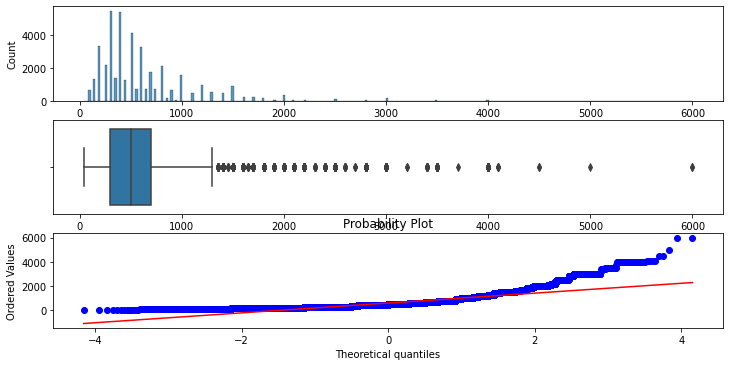

In [368]:
plt.figure(figsize=(12,8))

plt.subplot(411)
sns.histplot(data['approx_cost(for two people)'] )

plt.subplot(412)
sns.boxplot(data['approx_cost(for two people)'])

plt.subplot(413)
sns.distplot(data['approx_cost(for two people)'])

plt.subplot(414)
stats.probplot(data['approx_cost(for two people)'] ,plot=plt )
plt.show()

In [ ]:
## boxplot basically gives us 25th percentile,50th percentile(median) ,
## 75th percentile & whiskers 
## whiskers may be defined in different ways in different tools & packages..

## sometimes it shows 99th percentile & 1 percentile value for different package 
## sometimes it shows min & max value for different package  ..

In [ ]:
### Conclusion : ie we have a lot of Outliers in "approx_cost(for two people)"..

In [ ]:
### In the Q-Q pLots, if the variable is normally distributed, 
### the values of the variable should fall in a 45 degree line (or a stright line)

## QQ-plot : It Compares the sample quantiles(on y-axis) and theoretical quantiles(on x-axis)
### On x-axis , we have the theoretical quantiles(what we have on x-axis : Normal distribution graph)
## on y-axis , we have sample quantiles 

In [ ]:
'''

In statistics, a Q–Q (quantile-quantile) plot is a probability plot, which is a graphical method for comparing 
two probability distributions by plotting their quantiles against each other.


'''

In [ ]:
'''


we can achieve distribution plot by smoothening our histogram 
using KDE ie PDF is a smoothen form of your histogram !
ie histogram -->> apply KDE -->> we will get distribution plot 



This is called density plot bcz here height represents how many 
pts exists at each of these intervals or how dense 
each of the region is !



density(distribution) plot:at a point ,what is a density of a data pt. ?
                or
how many percentage of data pts available at some particular pt .. ?
                or 
What is the % of data points that I will encounter at any point ? 
                or
what is the probability of certain data pt in whole data ?
                or 
prob that my data has value has some specific value 



'''

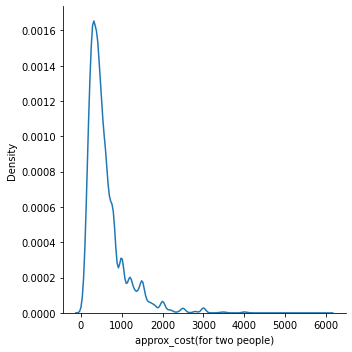

In [369]:
sns.displot(data['approx_cost(for two people)'] , kind='kde')

### there is skewness in data ..

## 12.. Handling Outliers 

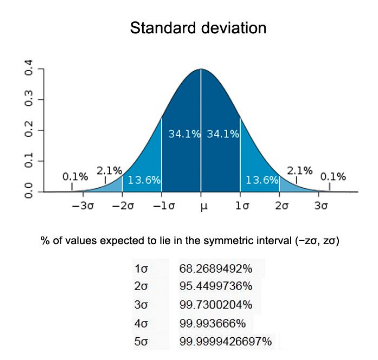

In [2]:
from IPython.display import Image
Image(filename=r'C:\Users\mcr\Entire Data Science\3.. Feature_Engineering\Outliers Detection/Z-score.PNG') 

    Above Figure shows area under normal curve and how much area that standard deviation covers.
    * 68% of the data points lie between mu(mean) +- 1 standard deviation, ie between 1 std, we have 68 % of data point
    * 95% of the data points lie between mu(mean)+- 2 standard deviation, ie between 2 std, we have 95 % of data point
    * 99.7% of the data points lie between mu(mean)+- 3 standard deviation ie between 3 std dev,we have 99.7 % of data point


In [3]:
'''

ie if Any feature follows normal distribution , which is best suited for ML Algo 
   then their 99 percent of data pts or their 99% values lie between 3 std dev(u+-3sigma) .


'''

'\n\nie if Any feature follows normal distribution , which is best suited for ML Algo \n   then their 99 percent of data or their 99% values lie between 3 std dev .\n\n\n'

In [ ]:
'''

In the Q-Q pLots, if the variable is normally distributed, u will see a straight line
ie the values of the variable should fall in a 45 degree line 

QQ-plot : It Compares the sample quantiles(on y-axis) and theoretical quantiles(on x-axis)


On x-axis , we have the theoretical quantiles(what we have on x-axis : Normal distribution graph)
ie theoritical quantiles are those values which are the quantiles of the normal distribution :
So if I plot a normal distribution & if I fit these quantiles like Q1 , Q2 , Q3 in below digram

'''

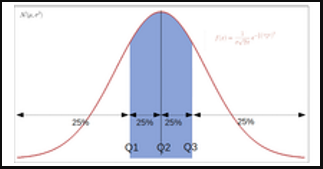

In [7]:
from IPython.display import Image
Image(filename=r'C:\Users\mcr\Entire Data Science\3.. Feature_Engineering\Outliers Detection/qqplot.png') 

In [ ]:
'''

On y-axis , we have sample quantiles
ie sample quantiles are those values which we have extracted from sample(data) 
eg 25th percentile value , 50th percentile value , etc ..

'''

In [ ]:
'''

In statistics, a Q–Q (quantile-quantile) plot is a probability plot, which is a graphical method for comparing 
two probability distributions by plotting their quantiles against each other.


'''

In [ ]:
### lets do Log transformation , since we have skewness ...

In [ ]:
'''

log1p():  Return the natural logarithm of one plus the input array, 
element-wise having base e... ie log base-e(x+1) or log(x+1)

My data could have value as 0 on account of some typo so lets use , 
log1p = log(x+1) , bcz log(0) is undefined ..

'''

<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='Density'>

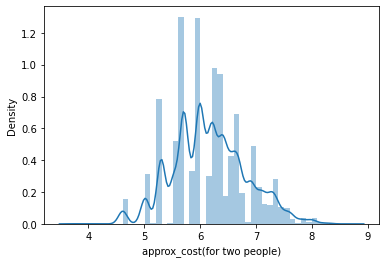

In [370]:
sns.distplot(np.log1p(data['approx_cost(for two people)']))

In [371]:
data['approx_cost(for two people)'] = np.log1p(data['approx_cost(for two people)']) 

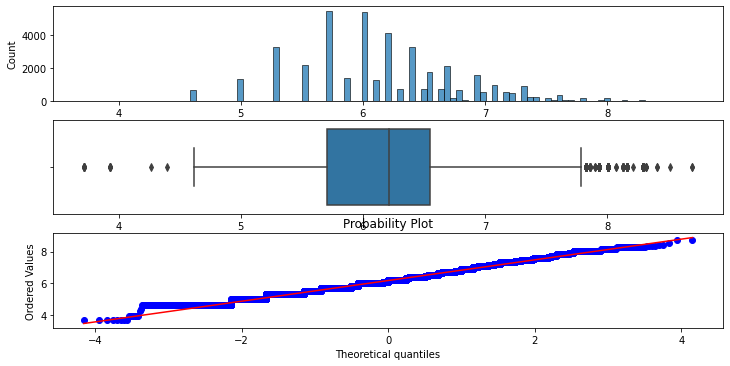

In [372]:

plt.figure(figsize=(12,8))

plt.subplot(411)
sns.histplot(data['approx_cost(for two people)'] )

plt.subplot(412)
sns.boxplot(data['approx_cost(for two people)'])

plt.subplot(413)
sns.distplot(data['approx_cost(for two people)'])

plt.subplot(414)
stats.probplot(data['approx_cost(for two people)'] ,plot=plt )
plt.show()

#### Lets deal with 'votes' feature ..

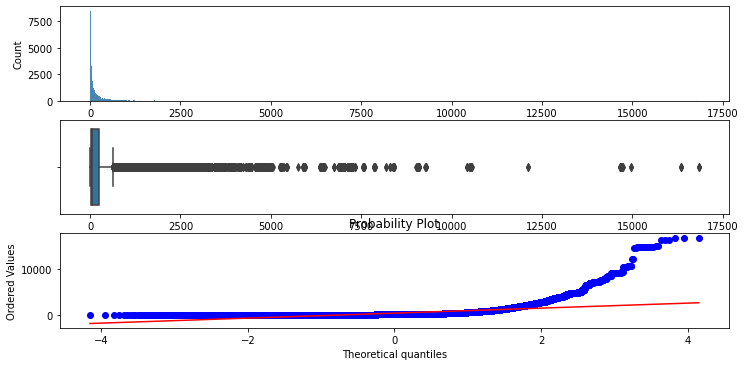

In [374]:
plt.figure(figsize=(12,8))

plt.subplot(411)
sns.histplot(data['votes'] )

plt.subplot(412)
sns.boxplot(data['votes'])

plt.subplot(413)
sns.distplot(data['votes'])

plt.subplot(414)
stats.probplot(data['votes'] ,plot=plt )
plt.show()

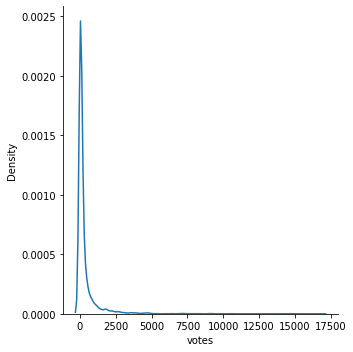

In [375]:
sns.displot(data['votes'] , kind='kde')

### there is skewness in data ..

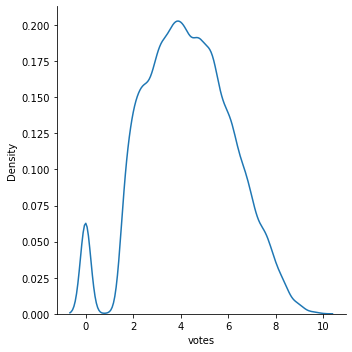

In [379]:
sns.displot(np.log1p(data['votes']) , kind='kde')

### not exact normally distributed ,, but upto some extent , 
## it is normally dist ..

In [380]:
data['votes'] = np.log1p(data['votes'])

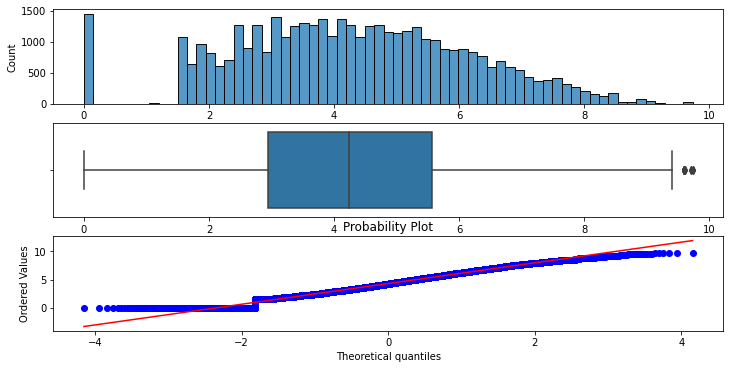

In [381]:
plt.figure(figsize=(12,8))

plt.subplot(411)
sns.histplot(data['votes'] )

plt.subplot(412)
sns.boxplot(data['votes'])

plt.subplot(413)
sns.distplot(data['votes'])

plt.subplot(414)
stats.probplot(data['votes'] ,plot=plt )
plt.show()

In [382]:
data.head(2)

,votes,location,approx_cost(for two people),listed_in(city),target,online_order_Yes,book_table_Yes,rest_type_Casual Dining,rest_type_Delivery,rest_type_Dessert Parlor,rest_type_Quick Bites,"rest_type_Takeaway, Delivery",rest_type_other,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,6.654153,0.477124,6.685861,0.482993,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
1,6.669498,0.477124,6.685861,0.482993,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0


## 13.. model building !

In [383]:
data.dtypes

votes                                 float64
location                              float64
approx_cost(for two people)           float64
listed_in(city)                       float64
target                                  int64
online_order_Yes                        uint8
book_table_Yes                          uint8
rest_type_Casual Dining                 uint8
rest_type_Delivery                      uint8
rest_type_Dessert Parlor                uint8
rest_type_Quick Bites                   uint8
rest_type_Takeaway, Delivery            uint8
rest_type_other                         uint8
listed_in(type)_Cafes                   uint8
listed_in(type)_Delivery                uint8
listed_in(type)_Desserts                uint8
listed_in(type)_Dine-out                uint8
listed_in(type)_Drinks & nightlife      uint8
listed_in(type)_Pubs and bars           uint8
dtype: object

In [ ]:
'''

u : type character code for un-signed integers : 

Variations of unsigned integer are : ('uint64','uint32','uint16','uint8') in numpy library..
By the way , all the variations of signed integers comes sub-class numpy.unsignedinteger

uint8 is a 8 bit un-signed integer , it means it can store only positive values
Range->> Integer values from (0 to 255) ie [0 to 2^8 -1]
uint8 has a length of 8 bits (1 bytes). 

uint16 is a 16 bit un-signed integer , it means it can store only positive values
Range->> Integer values from (0 to 65535) ie [0 to 2^16 -1]
uint16 has a length of 16 bits (2 bytes).


uint32 is a 32 bit un-signed integer , it means it can store only positive values
Range->> Integer values from (0 to 4294967295) ie [0 to 2^32 -1]
uint32 has a length of 32 bits (4 bytes).


uint64 is a 64 bit un-signed integer , it means it can store only positive values
Range->> Integer values from (0 to 18446744073709551615) ie [0 to 2^64 -1]
uint64 has a length of 64 bits (8 bytes).


'''

In [384]:
# Splitting the data
X = data.drop('target', axis=1)
y = data['target'].values

In [385]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, \
                            test_size=.20, random_state=42)

In [386]:
X_train.shape

(33715, 18)

In [387]:
# Import the random forest model.
from sklearn.ensemble import RandomForestClassifier


In [388]:
# Initialize the model with some parameters.
rf_model = RandomForestClassifier()


In [389]:
# Fit the model to the data...
rf_model.fit(X_train, y_train) ## takes 10-20 sec sec 

RandomForestClassifier()

In [390]:
# Make predictions.
predictions = rf_model.predict(X_test)

In [391]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions,y_test)

0.9211057064895005

In [392]:
# Compute the error.. 
from sklearn.metrics import confusion_matrix
confusion_matrix(predictions, y_test)

array([[3996,  366],
       [ 299, 3768]], dtype=int64)

## 14.. model hypertuning !

In [278]:
from sklearn.model_selection import RandomizedSearchCV

In [280]:
### initialise your estimator

reg_rf = RandomForestClassifier()

In [287]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,\
                                  stop=1200,num=3)]

# Number of features to consider at every split
max_features=['auto','sqrt']

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=3)]

# Minimum number of samples required to split a node
min_samples_split=[5,10,100]

In [288]:
# Create the random grid or hyper-parameter space

random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [289]:
random_grid

{'n_estimators': [100, 650, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 17, 30],
 'min_samples_split': [5, 10, 100]}

In [283]:
## total iterations
# 6*2*4*4 *3

576

In [291]:
## total iterations
3*2*3*3 *2

108

In [293]:
## Define searching

# Random search of parameters, using 3 fold cross validation
# search across 576 different combinations


rf_random = RandomizedSearchCV(estimator=reg_rf,\
                           param_distributions=random_grid,\
                               cv=2,verbose=2,n_jobs=-1)

In [294]:
### takes 4-5 mins for 108 iterations 
rf_random.fit(X_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 17, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 100],
                                        'n_estimators': [100, 650, 1200]},
                   verbose=2)

In [298]:
rf_random.best_params_

{'n_estimators': 650,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 30}

In [297]:
rf_reg = RandomForestClassifier(max_depth=30, \
            min_samples_split=5, n_estimators=650)

In [300]:
rf_reg.fit(X_train , y_train)

RandomForestClassifier(max_depth=30, min_samples_split=5, n_estimators=650)

In [301]:
rf_pred = rf_reg.predict(X_test)

In [303]:
accuracy_score(rf_pred , y_test)

0.8187515360039321

In [304]:
confusion_matrix(rf_pred , y_test)

array([[3646,  889],
       [ 586, 3017]], dtype=int64)

## 15.. Playing with Multiple Algos !

In [393]:
#fit naive bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier


In [394]:
### classifier models
models = []

models.append(('LogisticRegression', LogisticRegression()))
models.append(('Naive Bayes',GaussianNB()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))

In [395]:
models

[('LogisticRegression', LogisticRegression()),
 ('Naive Bayes', GaussianNB()),
 ('RandomForest', RandomForestClassifier()),
 ('Decision Tree', DecisionTreeClassifier()),
 ('KNN', KNeighborsClassifier())]

In [396]:
for name,model in models:
    print(name)
    print(model)
    print('\n')

LogisticRegression
LogisticRegression()


Naive Bayes
GaussianNB()


RandomForest
RandomForestClassifier()


Decision Tree
DecisionTreeClassifier()


KNN
KNeighborsClassifier()




In [397]:
# Make predictions on testing dataset

for name, model in models:
    print(name)
    model.fit(X_train, y_train)
    
    # Make predictions.
    predictions = model.predict(X_test)

    # Compute the error.
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(predictions, y_test))

    from sklearn.metrics import accuracy_score
    print(accuracy_score(predictions,y_test))
    print('\n')

LogisticRegression
[[3547  984]
 [ 748 3150]]
0.7945189227666389


Naive Bayes
[[3760 1823]
 [ 535 2311]]
0.7202515126349508


RandomForest
[[3994  370]
 [ 301 3764]]
0.9203938782773757


Decision Tree
[[4018  244]
 [ 277 3890]]
0.9381895835804959


KNN
[[3701  611]
 [ 594 3523]]
0.8570411673982679




#### https://stackoverflow.com/questions/71352354/sklearn-kmeans-is-not-working-as-i-only-get-nonetype-object-has-no-attribute

In [ ]:
### install this threadpoolctl==3.1.0 to get rid of  
## "AttributeError: 'NoneType' object has no attribute 'split'" in KNN algo ..

In [343]:
## !pip install threadpoolctl==3.1.0

  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.1.0
    Uninstalling threadpoolctl-2.1.0:
      Successfully uninstalled threadpoolctl-2.1.0


In [ ]:
### Note : Initially we do not have 'votes' feature before + we have not filled missing values of 'rate' as well , accuracy was 77 in rf
# but after adding 'votes' feature + we have filled missing values of 'rate' as well using ast , accuracy is 92 in rf